# Analysis on Soccer data | .sqlite

### Questions
- What teams improved the most over the time period?
- Which players had the most penalties?

### Import packages

In [14]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt 

### Read data

In [15]:
# First we create a connection object that represents the database
conn = sqlite3.connect('../dataset/soccer_data.sqlite')

In [16]:
# Then we create a cursor
c = conn.cursor()

In [17]:
# let us prepare a function to display a needed tables
def pdsql(str,con=conn):
    
    data = pd.read_sql('''{}'''.format(str), con)
    return data

# call a function
pdsql('''SELECT * FROM player LIMIT 10''')

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [18]:
# select all player data from player table
player = pdsql('SELECT * FROM player')

# display top 5 rows.
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [19]:
# select all Country data from country table.
country = pdsql('SELECT * FROM Country')

#display top 5 rows.
country.head() 

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [20]:
# select all muchs
match = pdsql('SELECT * FROM Match')
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [21]:
league = pdsql('SELECT * FROM League')
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [22]:
teams = pdsql('SELECT * FROM Team')
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


### Now lets join all the above tables into one data frame.

In [23]:
# SQL query to join multiple tables
soccer_data = pdsql("""
    SELECT 
        Match.id AS match_id,
        Country.name AS country_name, 
        League.name AS league_name, 
        Match.season, 
        Match.stage, 
        Match.date,
        HT.team_long_name AS home_team,
        AT.team_long_name AS away_team,
        Match.home_team_goal, 
        Match.away_team_goal,
        Team.team_long_name AS team_name,
        Player.player_name
    FROM Match
    JOIN Country ON Country.id = Match.country_id
    JOIN League ON League.id = Match.league_id
    LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id
    LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id
    LEFT JOIN Team ON Team.team_api_id = Match.home_team_api_id  -- Assuming you want information about the home team
    LEFT JOIN Player ON Player.player_api_id = Team.team_api_id  -- Assuming you want information about players in the home team
""")

soccer_data.head()


,match_id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,team_name,player_name
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,KRC Genk,None
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,SV Zulte-Waregem,None
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,KSV Cercle Brugge,None
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,KAA Gent,None
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,FCV Dender EH,None


### Let us make simple visualization on Home Team Goals vs Away Team Goals

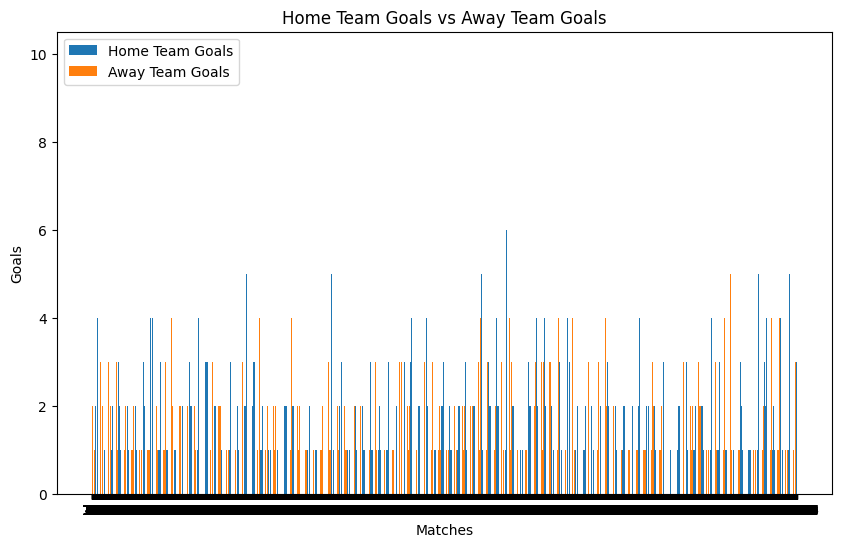

In [24]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions for the bars
positions = range(len(soccer_data))

# Bar plots for home team goals and away team goals
bar1 = ax.bar(positions, soccer_data['home_team_goal'], bar_width, label='Home Team Goals')
bar2 = ax.bar([pos + bar_width for pos in positions], soccer_data['away_team_goal'], bar_width, label='Away Team Goals')

# Set labels, title, and legend
ax.set_xlabel('Matches')
ax.set_ylabel('Goals')
ax.set_title('Home Team Goals vs Away Team Goals')
ax.set_xticks([pos + bar_width / 2 for pos in positions])
ax.set_xticklabels(soccer_data['match_id'])
ax.legend()

# Display the plot
plt.show()


## 1. What teams improved the most over the time period?

In [25]:
# Convert the 'date' column to datetime format
soccer_data['date'] = pd.to_datetime(soccer_data['date'])

# Filter data for the relevant time period
start_date = '2008-08-16'
end_date = '2015-09-23'
filtered_data = soccer_data[(soccer_data['date'] >= start_date) & (soccer_data['date'] <= end_date)]

# Calculate goal differentials for each team
team_goal_diff = (filtered_data.groupby('home_team')['home_team_goal'].sum() - filtered_data.groupby('home_team')['away_team_goal'].sum() +
                  filtered_data.groupby('away_team')['away_team_goal'].sum() - filtered_data.groupby('away_team')['home_team_goal'].sum())

# Find the team with the highest positive change in goal differential
most_improved_team = team_goal_diff.idxmax()

print(f"The most improved team over the period {start_date} to {end_date} is: {most_improved_team}")


The most improved team over the period 2008-08-16 to 2015-09-23 is: FC Barcelona


### 2. Which players had the most penalties?

In [26]:
# SQL query to find players with the most penalties
most_penalties_query = """
    SELECT
        Player.player_name,
        AVG(Player_Attributes.penalties) AS avg_penalties
    FROM Player
    JOIN Player_Attributes ON Player.player_api_id = Player_Attributes.player_api_id
    GROUP BY Player.player_name
    ORDER BY avg_penalties DESC
    LIMIT 10  -- Adjust the limit as needed
"""

# Execute the query
most_penalties_data = pdsql(most_penalties_query)

# Display the results
print(most_penalties_data)


          player_name  avg_penalties
0       Paolo Maldini      92.000000
1         Dario Smoje      89.750000
2     Mario Balotelli      89.565217
3     Francesco Totti      89.550000
4         David Villa      89.166667
5          Roy Makaay      88.166667
6  Zlatan Ibrahimovic      88.000000
7        Timmy Simons      87.607143
8         Adrian Mutu      87.333333
9     Michael Ballack      87.200000
